In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

plt.close("all")
plt.style.use('ggplot')

In [2]:
# Prepeare data




df = pd.read_csv('Walmart.csv')

df = df.astype({'Date': 'datetime64[ns]', 'Holiday_Flag': 'category', 'Store': 'category'})

df['Weekly_Sales_mln'] = df['Weekly_Sales'] / 1_000_000   
df['Temperature_Celsius'] = (df['Temperature'] - 32) / 1.8
df['Fuel_Price_Liter'] = df['Fuel_Price'] / 3.78541 

df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_mln,Temperature_Celsius,Fuel_Price_Liter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,1.643691,5.727778,0.679451
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,1.641957,3.616667,0.673111
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.611968,4.405556,0.664129
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.409728,8.127778,0.676545
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,1.554807,8.055556,0.693452


First, we load the data, then we change the type of the column Date so we can work with it as datetime64. We also change the columns Holiday_Flag and Store to the type category for more effective work with them. We also create a help column Weekly_Sales_mln where the sales will be written in millions. Then we change the temperature to degrees Celsius and also change the fuel price from one gallon to one liter. And we look at a few first rows of the dataframe we got.

C:\Users\user\AppData\Local\Temp\ipykernel_772\3025882471.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = df.groupby('Store').agg( total_sales=('Weekly_Sales_mln', 'sum') )


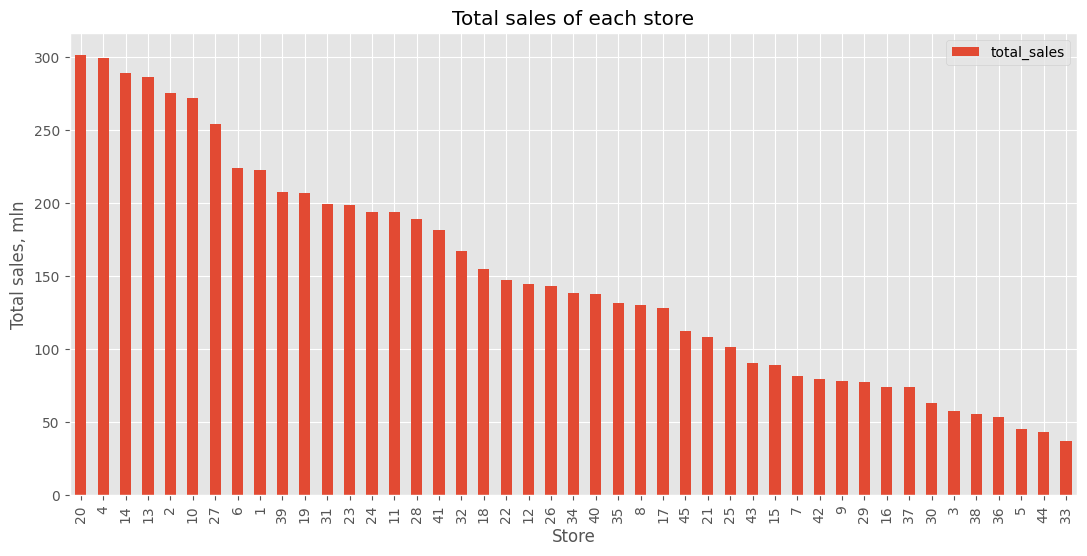

In [3]:
# Which store sold the most.




d = df.groupby('Store').agg( total_sales=('Weekly_Sales_mln', 'sum') )
d.sort_values(by='total_sales', inplace=True, ascending=False)



d.plot.bar(figsize=(13, 6), title='Total sales of each store', ylabel='Total sales, mln')
plt.show()


This graph shows the total sales of each store. We see that store 20 sold the most, while stores 4, 14, 13, 2, 10, and 27 also have very high sales – more than 250 million. The store with the lowest sales is store 33, with less than 50 million. We can see a big difference in sales values of some stores, for example, between store 33 and store 20 it is more than 6 times. Later, we will look at how economic factors and weather affect these sales.

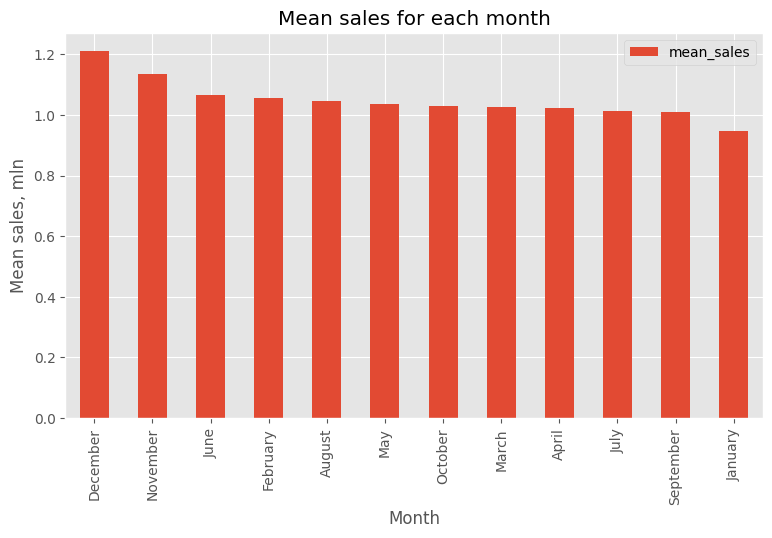

In [4]:
# Which month is the most profitable.




df['Month'] = df['Date'].dt.month_name()

d = df.groupby('Month').agg( mean_sales=('Weekly_Sales_mln', 'mean') )
d.sort_values(by='mean_sales', ascending=False, inplace=True)



d.plot.bar( figsize=(9, 5), title='Mean sales for each month', ylabel='Mean sales, mln' )
plt.show()


This graph shows the average sales for each month. We see that December and November have the highest values, probably because these months have the biggest holidays like Thanksgiving, Christmas, and New Year. On later graphs, we will look at how holidays affect sales. The lowest sales are in January, probably because in the two months before people spent the most money. In the middle are the sales in June to September, and the sales in these months are almost the same.

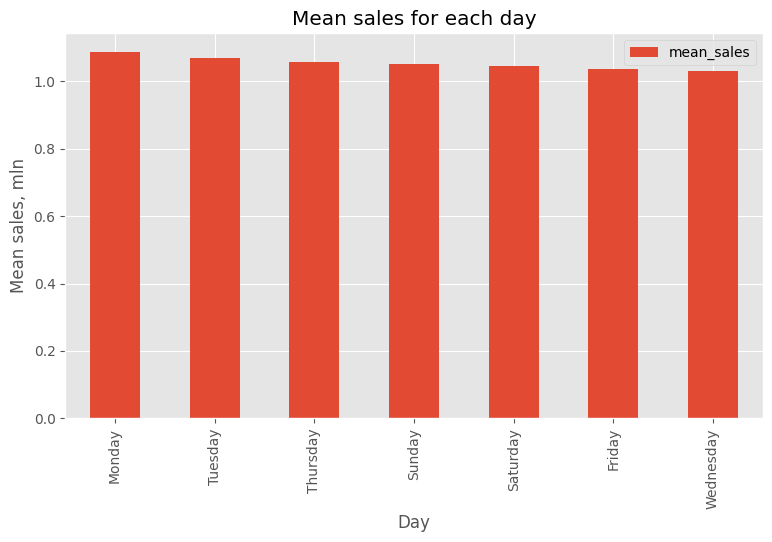

In [5]:
# Which day of week is the most profitible.




df['Day'] = df['Date'].dt.day_name()

d = df.groupby('Day').agg( mean_sales=('Weekly_Sales_mln', 'mean') )

d.sort_values(by='mean_sales', ascending=False, inplace=True)



d.plot.bar( figsize=(9, 5), title='Mean sales for each day', ylabel='Mean sales, mln' )
plt.show()


This graph shows the average sales for each day of the week. We see that the sales values for each day are very similar, so we cannot say that one day of the week is much more successful than the others, but Monday has a little higher sales value.

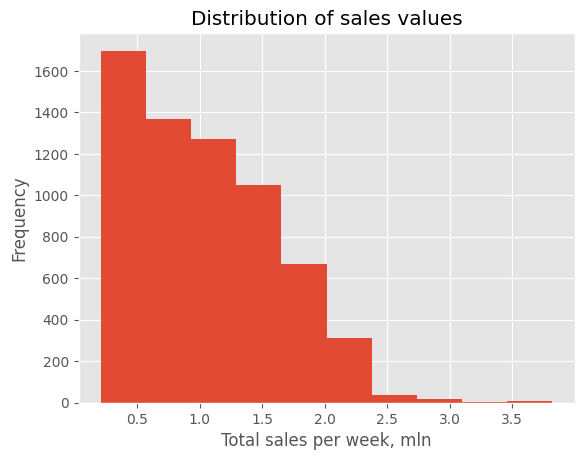

In [6]:
# How sales values are distributed.




df['Weekly_Sales_mln'].plot.hist( xlabel='Total sales per week, mln', title='Distribution of sales values' )
plt.show()


This graph shows the distribution of weekly sales values. We see that most values are for weekly sales less than 0.5 million. The higher the sales value is, the less often it appears. Weekly sales higher than 2.5 million appear very rarely.

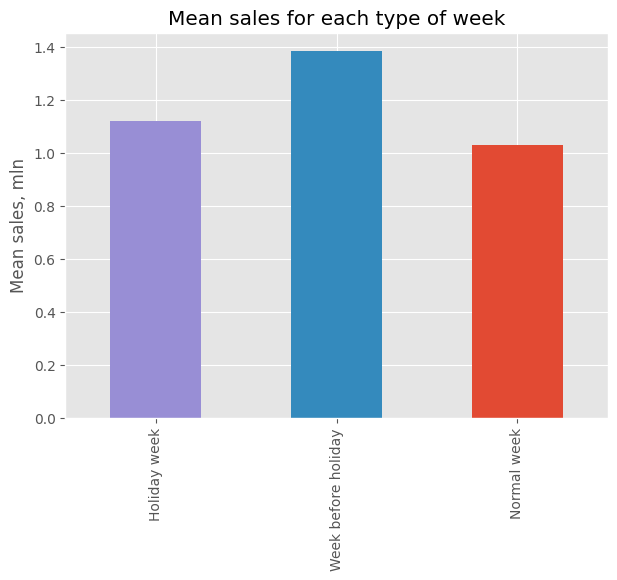

In [7]:
# How holidays influence to sales.




holiday = df[ df['Holiday_Flag'] == 1 ]['Date'].unique()
pre_holiday = df[ (df['Holiday_Flag'] == 0)  &  df['Date'].isin(holiday - pd.Timedelta(days=7)) ]['Date'].unique()            
normal = df[ (df['Holiday_Flag'] == 0)  &  ~df['Date'].isin(pre_holiday) ]['Date'].unique()


holiday_mean_sales = df[ df['Date'].isin(holiday) ]['Weekly_Sales_mln'].mean()
pre_holiday_mean_sales = df[ df['Date'].isin(pre_holiday) ]['Weekly_Sales_mln'].mean()
normal_mean_sales = df[ df['Date'].isin(normal) ]['Weekly_Sales_mln'].mean()


d = pd.Series([holiday_mean_sales, pre_holiday_mean_sales, normal_mean_sales], 
              index=['Holiday week', 'Week before holiday', 'Normal week'])



d.plot.bar(color=['#988ED5', '#348ABD', '#E24A33'], figsize=(7, 5), title='Mean sales for each type of week', ylabel='Mean sales, mln')
plt.show()


This graph shows the average sales for holiday weeks, pre-holiday weeks, and normal weeks. We see a big difference between these types of weeks. The average sales in normal weeks are the lowest, then come holiday weeks, and pre-holiday weeks have a much higher value. This confirms the idea that sales in November and December are the highest because of holidays. The sales values in pre-holiday weeks are higher than in holiday weeks, probably because people buy things early before big holidays.

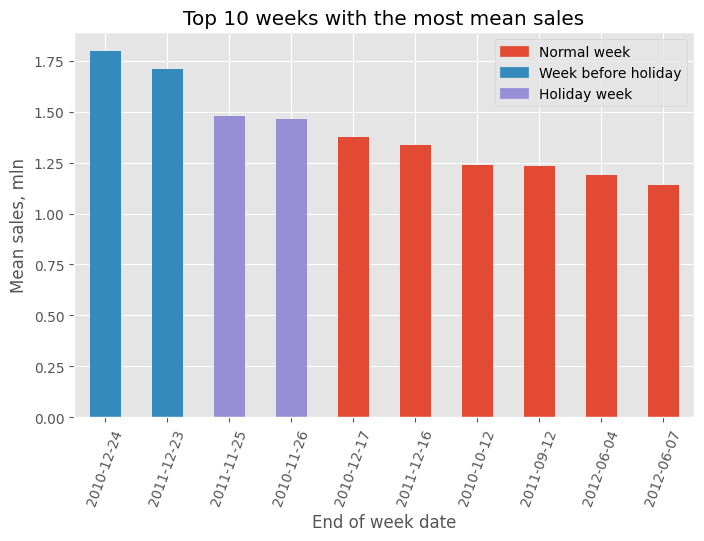

In [8]:
# Top 10 weeks with the most mean profitable.




d = df.groupby('Date').agg( mean_sales=('Weekly_Sales_mln', 'mean') )

d.sort_values(by='mean_sales', ascending=False, inplace=True)

d = d.iloc[:10]

holiday_weeks = df[ df['Holiday_Flag'] == 1 ]['Date'].unique()
pre_holiday_weeks = df[ (df['Holiday_Flag'] == 0)  &  df['Date'].isin(holiday_weeks - pd.Timedelta(days=7)) ]['Date'].unique()     


colors_dict = {'normal_week': '#E24A33', 'pre_holiday_week': '#348ABD', 'holiday_week': '#988ED5'}
colors = []

for date in d.index.values:

    if date in holiday_weeks:

        colors.append( colors_dict['holiday_week'] )

    elif date in pre_holiday_weeks:

        colors.append( colors_dict['pre_holiday_week'] )

    else:

        colors.append( colors_dict['normal_week'] )



d.index = pd.to_datetime(d.index).strftime('%Y-%m-%d')



d['mean_sales'].plot.bar(color=colors, title='Top 10 weeks with the most mean sales', xlabel='End of week date', ylabel='Mean sales, mln', figsize=(8, 5))
plt.xticks(rotation=70)
plt.legend(handles=[
    Patch(color='#E24A33', label='Normal week'),
    Patch(color='#348ABD', label='Week before holiday'),
    Patch(color='#988ED5', label='Holiday week')
])
plt.show()

This graph shows the 10 most profitable weeks. We see again that the highest values are in pre-holiday weeks and holiday weeks, which connects to the previous graphs.

C:\Users\user\AppData\Local\Temp\ipykernel_772\2449655843.py:18: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  values.append( d[ d['Date'].isin(dates) ]['Weekly_Sales_mln'].mean() )


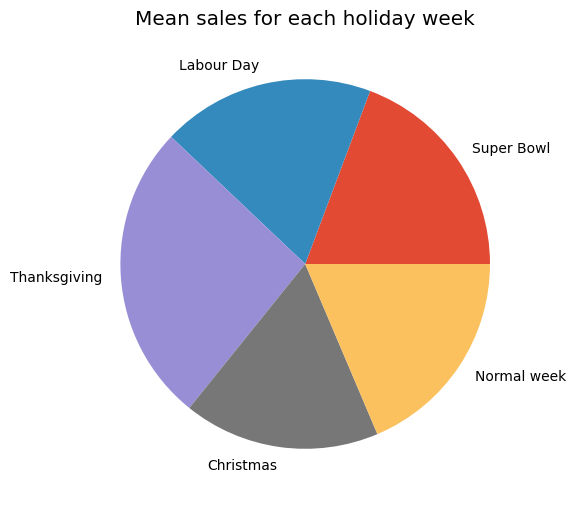

In [9]:
# Which holiday week is the most profitable.




d = df[ df['Holiday_Flag'] == 1 ]

holiday_events = {'Super Bowl': ['2010-12-02', '2011-11-02', '2012-10-02'],
                  'Labour Day': ['2010-10-09', '2011-09-09', '2012-07-09'],
                  'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23'],
                  'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28']}


values = []

for dates in holiday_events.values():

   values.append( d[ d['Date'].isin(dates) ]['Weekly_Sales_mln'].mean() )


d = pd.Series(values, index=holiday_events.keys())

d.loc['Normal week'] = df[ df['Holiday_Flag'] == 0 ]['Weekly_Sales_mln'].mean()



d.plot.pie( figsize=(6, 6), title='Mean sales for each holiday week' )
plt.show()


This graph shows the average sales for each holiday. We see that the values for Labour Day, Super Bowl, and Christmas are almost the same and similar to sales in normal weeks. The weeks with the holiday Thanksgiving have a much higher sales value.

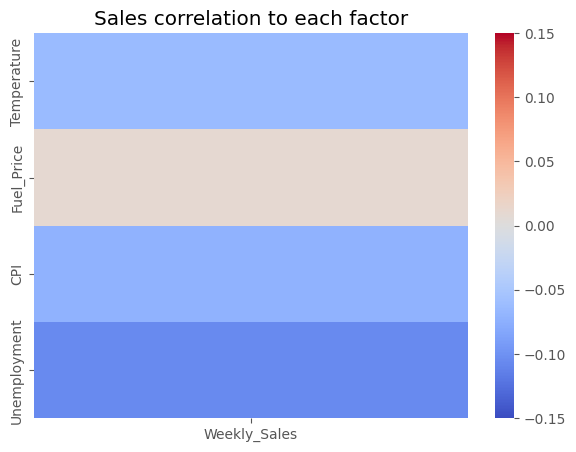

In [10]:
# How ekonomics and weather factors on the region infuence to sales.




d = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

d = d.loc[ 'Temperature': , ['Weekly_Sales'] ]



plt.figure(figsize=(7,5))
sns.heatmap(d, vmax=0.15, vmin=-0.15, cmap="coolwarm")
plt.title('Sales correlation to each factor')
plt.show()


This graph shows the correlations between factors like Temperature, Fuel Price, CPI, Unemployment rate, and sales. We see that the correlation values are very low, somewhere between -0.1 and 0.1, which suggests that there is no strong relationship between these factors and sales. In the next graphs, we will see how sales depend on these factors.

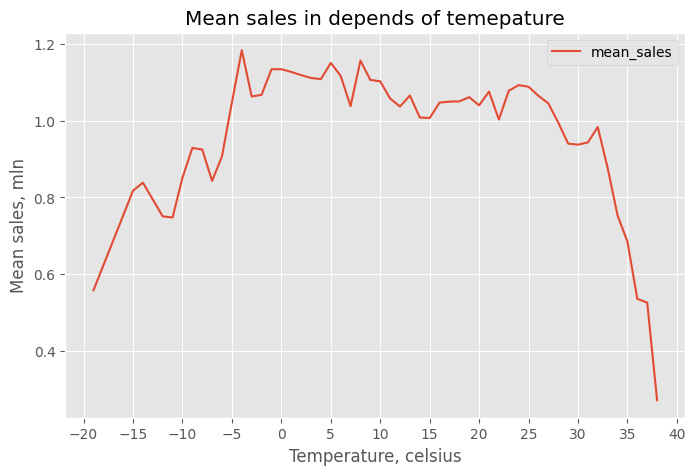

In [11]:
# How temperatures influence to sales.




df['Temperature_Celsius_Round'] = df['Temperature_Celsius'].round()

d = df.groupby('Temperature_Celsius_Round').agg( mean_sales=('Weekly_Sales_mln', 'mean') )



ax = d.plot.line( figsize=(8, 5), title='Mean sales in depends of temepature', xlabel='Temperature, celsius', ylabel='Mean sales, mln' )
ax.set_xticks(range(-20, 45, 5))
plt.show()


This graph shows the relationship between the outside temperature and average sales. We see that the highest sales values are when the temperature is between -5 and 30 degrees. When the temperature is lower or higher than this range, sales go down a lot because this is not a comfortable temperature for people. I think that some seasonal offers, for example in summer: if you buy for more than 100 dollars – you get ice cream as a gift, and something similar for winter, could help balance sales during such extreme temperatures.

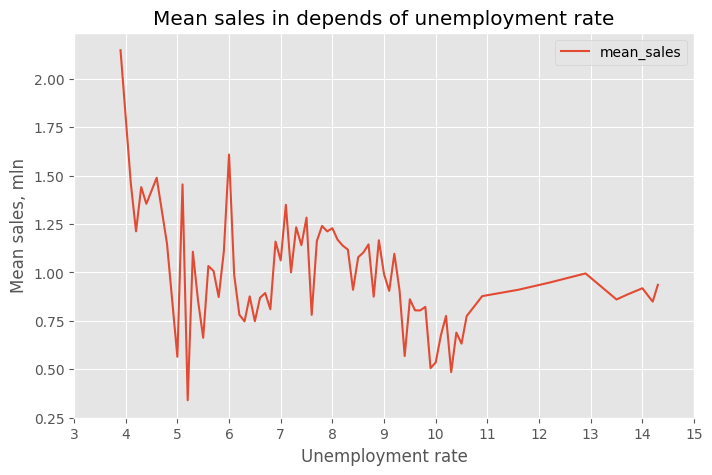

In [12]:
# How Unemployment rate in the region influence to sales.




df['Unemployment_Round'] = df['Unemployment'].round(1)

d = df.groupby('Unemployment_Round').agg( mean_sales=('Weekly_Sales_mln', 'mean') )



ax = d.plot.line( figsize=(8, 5), title=('Mean sales in depends of unemployment rate'), xlabel='Unemployment rate', ylabel='Mean sales, mln' )
ax.set_xticks(range(3, 16))
plt.show()


This graph shows the relationship between the unemployment rate and average sales. We see a general trend that when the unemployment rate goes up, sales go down, which is logical because the buying power of people without a job is lower than of people who have a job.

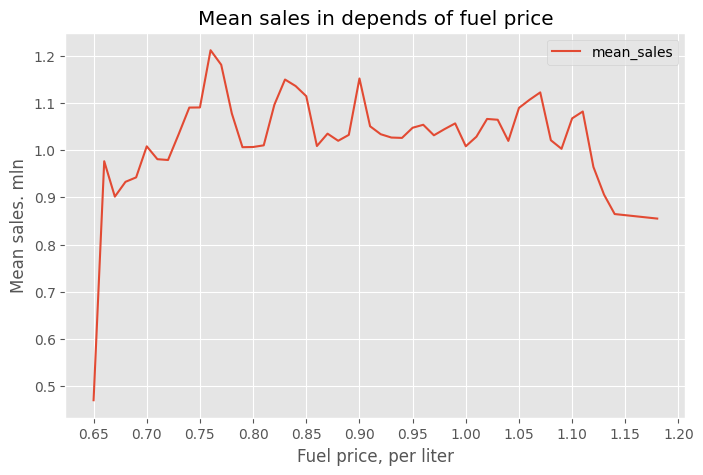

In [ ]:
# How fuel price influence to sales.




df['Fuel_Price_Liter_Round'] = df['Fuel_Price_Liter'].round(2)

d = df.groupby('Fuel_Price_Liter_Round').agg( mean_sales=('Weekly_Sales_mln', 'mean') )



ax = d.plot.line( figsize=(8, 5), title='Mean sales in depends of fuel price', xlabel='Fuel price, per liter', ylabel='Mean sales. mln' )
ax.set_xticks(np.arange(0.65, 1.25, 0.05))
plt.show()


This graph shows the relationship between fuel price and average sales. We see that the highest sales values are when the fuel price is between 0.75 and 1.10. When the price is outside this range, sales go down a lot. This is logical because when the fuel price is too low, the prices of goods also go down, so the total profit of the store decreases. On the other hand, when the fuel price is too high, buyers go to stores less often because fuel is expensive for them, and at the same time, the prices of goods go up.